In [1]:
import nibabel as nib
import numpy as np
import json
import os
import os.path
import matplotlib.pyplot as plt
import pandas as pd
from src.utils.data import getDataPandas

In [2]:
data = getDataPandas()
data = data.sample(frac=1, random_state=1).reset_index(drop=True)

In [3]:
dup = np.sum(data.duplicated(subset=['PATNO']))
print('患者出现不止一次: {}'.format(dup))

患者出现不止一次: 176


In [4]:
data_pvi = data
data_pv = data.drop_duplicates(subset=['PATNO', 'EVENT_ID'], keep='first').reset_index(drop=True)
data_p = data.drop_duplicates(subset=['PATNO'], keep='first').reset_index(drop=True)

In [5]:
print(len(data_pvi))
print(len(data_pv))
print(len(data_p))

325
222
149


In [6]:
print(len(data[data_pvi['SEX']==1]))
print(len(data[data_pvi['SEX']==0]))
print(len(data[data_pvi['CAT']==1]))
print(len(data[data_pvi['CAT']==0]))
data_pvi.describe()

206
119
173
152


,PATNO,NUPDR3OF,NUPDR3ON,AGE_AT_VISIT,SEX,SCORE,DURATION,CAT,LEDD,IQR
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,25579.947692,28.163077,18.818462,64.132000,0.633846,0.330156,46.633846,0.532308,682.858825,78.480862
std,26602.149968,12.419911,11.289442,9.259064,0.482495,0.250865,21.190307,0.499725,493.060277,3.434491
min,3107.000000,2.000000,1.000000,35.100000,0.000000,-0.272727,2.000000,0.000000,30.000000,70.090000
25%,3552.000000,19.000000,10.000000,57.400000,0.000000,0.153846,30.000000,0.000000,350.000000,76.220000
50%,4019.000000,28.000000,17.000000,65.000000,1.000000,0.333333,51.000000,1.000000,600.000000,79.070000
75%,41749.000000,36.000000,25.000000,71.300000,1.000000,0.500000,56.000000,1.000000,891.100000,81.180000
max,149511.000000,62.000000,64.000000,86.300000,1.000000,0.956522,112.000000,1.000000,5140.450000,84.970000


In [7]:
print(len(data_pv[data_pv['SEX']==1]))
print(len(data_pv[data_pv['SEX']==0]))
print(len(data_pv[data_pv['CAT']==1]))
print(len(data_pv[data_pv['CAT']==0]))
data_pv.describe()

146
76
109
113


,PATNO,NUPDR3OF,NUPDR3ON,AGE_AT_VISIT,SEX,SCORE,DURATION,CAT,LEDD,IQR
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,25924.139640,27.054054,18.509009,63.646396,0.657658,0.307628,42.283784,0.490991,652.368171,78.553288
std,28260.115764,12.486980,10.788271,9.257760,0.475566,0.250106,22.065833,0.501049,506.070306,3.323731
min,3107.000000,2.000000,1.000000,35.100000,0.000000,-0.272727,2.000000,0.000000,30.000000,70.320000
25%,3375.750000,17.000000,10.250000,56.825000,0.000000,0.104182,25.250000,0.000000,300.000000,76.280000
50%,3834.000000,26.000000,17.000000,64.850000,1.000000,0.288690,43.000000,0.000000,555.000000,79.065000
75%,41749.000000,35.000000,25.000000,70.675000,1.000000,0.460737,54.000000,1.000000,831.100000,81.180000
max,149511.000000,62.000000,64.000000,86.300000,1.000000,0.956522,112.000000,1.000000,5140.450000,84.970000


In [8]:
print(len(data_p[data_p['SEX']==1]))
print(len(data_p[data_p['SEX']==0]))
print(len(data_p[data_p['CAT']==1]))
print(len(data_p[data_p['CAT']==0]))
data_p.describe()

96
53
79
70


,PATNO,NUPDR3OF,NUPDR3ON,AGE_AT_VISIT,SEX,SCORE,DURATION,CAT,LEDD,IQR
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,30355.302013,27.275168,18.295302,63.550336,0.644295,0.315971,44.765101,0.530201,667.869356,78.648054
std,29949.219670,12.362137,10.411469,9.818003,0.480341,0.248027,22.426574,0.500770,539.389592,3.356659
min,3107.000000,2.000000,1.000000,35.100000,0.000000,-0.272727,3.000000,0.000000,30.000000,70.320000
25%,3557.000000,18.000000,11.000000,56.300000,0.000000,0.125000,27.000000,0.000000,342.400000,77.050000
50%,40543.000000,26.000000,17.000000,64.500000,1.000000,0.320755,50.000000,1.000000,600.000000,79.220000
75%,50901.000000,35.000000,24.000000,71.300000,1.000000,0.472222,55.000000,1.000000,834.800000,81.200000
max,149511.000000,62.000000,64.000000,86.300000,1.000000,0.956522,112.000000,1.000000,5140.450000,84.970000


Text(0.5, 1.0, 'U3 ON')

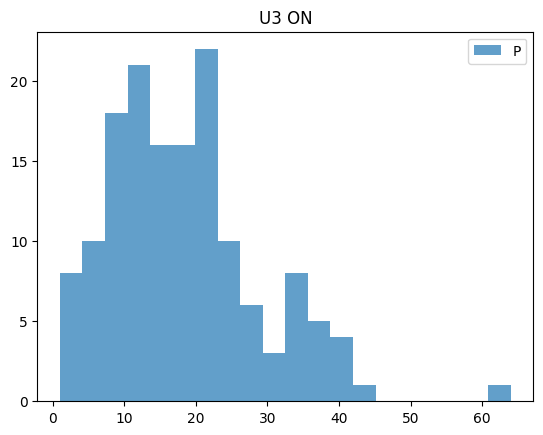

In [8]:
plt.hist([data_p['NUPDR3ON']], 20, label=['P'], alpha=0.7)
plt.legend()
plt.title('U3 ON')

Text(0.5, 1.0, 'U3 OFF')

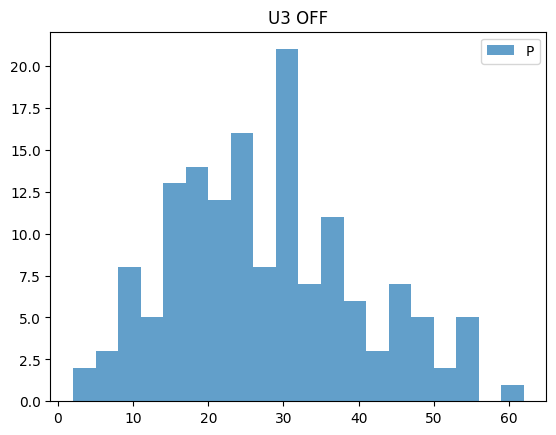

In [9]:
plt.hist([data_p['LEDD']], 20, label=['P'], alpha=0.7)
plt.legend()
plt.title('LEDD')

Text(0.5, 1.0, 'SCORE')

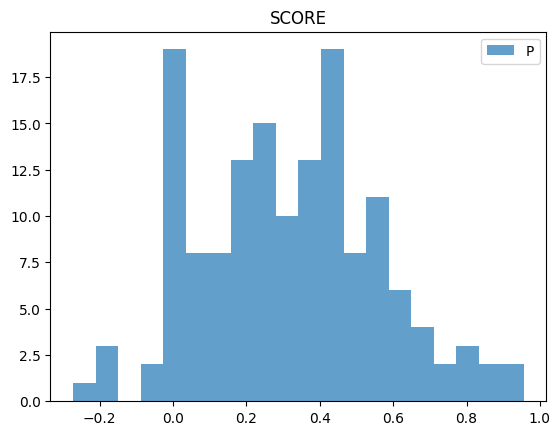

In [10]:
plt.hist([data_p['SCORE']], 20, label=['P'], alpha=0.7)
plt.legend()
plt.title('SCORE')

Text(0.5, 1.0, 'DURATION')

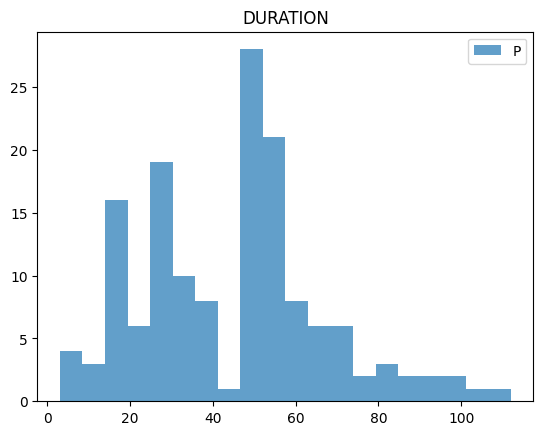

In [11]:
plt.hist([data_p['DURATION']], 20, label=['P'], alpha=0.7)
plt.legend()
plt.title('DURATION')

Text(0.5, 1.0, 'AGE_AT_VISIT')

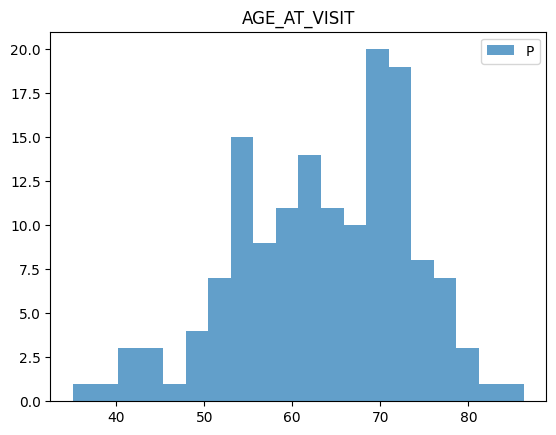

In [12]:
plt.hist([data_p['AGE_AT_VISIT']], 20, label=['P'], alpha=0.7)
plt.legend()
plt.title('AGE_AT_VISIT')

Text(0.5, 1.0, 'LEDD')

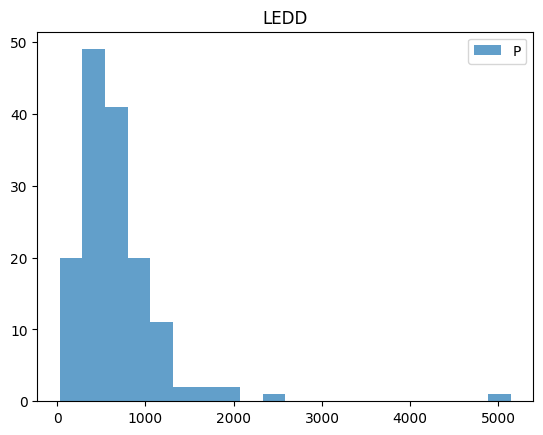

In [13]:
plt.hist([data_p['LEDD']], 20, label=['P'], alpha=0.7)
plt.legend()
plt.title('LEDD')